# Assignment 4: Solutions

## Problem 1: Measuring butterflies
To discover things about a butterfly population, the Natural History Museum has measured the width of several butterflies in its collection. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

wing_widths = [7.02, 6.84, 6.56, 6.44, 0.0, 0.0, 4.92, 6.35, 6.07, 6.68, 6.91, 7.09, 8.90, 0.0,
               9.79, 6.32, 7.24, 7.27, 8.02, 0.0, 7.76, 6.94, 5.80, 7.43, 6.85, 8.44, 5.16, 7.96, 
               0.0, 6.99, 8.56, 5.20, 5.76, 6.87, 6.41, 0.0, 7.36, 5.74, 7.06, 6.44, 8.06, 7.86]

In [2]:
# Find the mean width of the wings:
wing_widths = np.array(wing_widths)
mean_ww = np.mean(wing_widths)

# Also find the median and the standard deviation.
median_ww = np.median(wing_widths)
std_ww = np.std(wing_widths)

In [3]:
# Find the width of the largest wing, and the smallest:
largest = np.argmax(wing_widths)
smallest = np.argmin(wing_widths)

(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  3.,
         7.,  9.,  3.,  4.,  2.,  1.,  1.]),
 array([ 0.    ,  0.4895,  0.979 ,  1.4685,  1.958 ,  2.4475,  2.937 ,
         3.4265,  3.916 ,  4.4055,  4.895 ,  5.3845,  5.874 ,  6.3635,
         6.853 ,  7.3425,  7.832 ,  8.3215,  8.811 ,  9.3005,  9.79  ]),
 <a list of 20 Patch objects>)

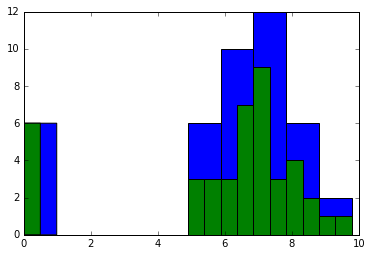

In [4]:
# Now plot a histogram of the data:

plt.hist(wing_widths)

# Try adjusting the number of bins in the histogram:
plt.hist(wing_widths, bins=20)

In [22]:
# Count how many wings have been given a wing width of zero:
n_zero_length = len(wing_widths[wing_widths==0])

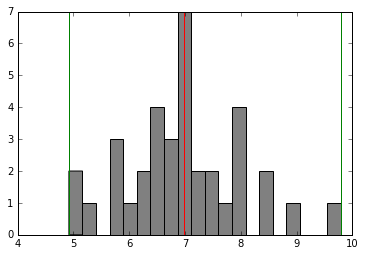

In [24]:
# Create a new numpy array that only contains the wing widths greater than zero:
nonzero_ww = wing_widths[wing_widths>0]

# Now find the new mean, median and min and max:
mean_nonzero_ww = np.mean(nonzero_ww)
median_nonzero_ww = np.median(nonzero_ww)
smallest_nonzero_ww = min(nonzero_ww)
largest_nonzero_ww = max(nonzero_ww)

# Plot a histogram of this data:
winghist = plt.hist(nonzero_ww, bins=20, color='grey')

# ***additional***
# Plot a vertical line, where the mean is
plt.vlines(mean_nonzero_ww, min(winghist[0]), max(winghist[0]), 'r')

# Plot a vertical line, where the smallest & largest  values are
plt.vlines(smallest_nonzero_ww, min(winghist[0]), max(winghist[0]), 'g')
plt.vlines(largest_nonzero_ww, min(winghist[0]), max(winghist[0]), 'g')

## Problem 2: Plotting parabolas
Write Python code that produces the following figure:
![alt text](http://www.cs.ucl.ac.uk/scipython/img/a4_parabolas.png "Parabolas")


In [25]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


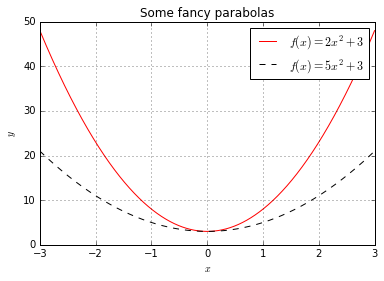

In [26]:
formula1 = '5*x**2+3'
formula2 = '2*x**2+3'
x = np.array(np.arange(-3, 3, 0.001))  
y1 = eval(formula1)
y2 = eval(formula2)
plt.plot(x, y1, color="red", label="$f(x) = 2x^2+3$")
plt.plot(x, y2, linestyle='--', color="black", label="$f(x) = 5x^2+3$")  
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Some fancy parabolas')
plt.legend()

## Problem 3: Healthy Breakfast
In this exercise we will do some simple analyses on a data set that contains information about 77 types of breakfast cereal. You can read about the data set at [CMU's website](http://lib.stat.cmu.edu/DASL/Stories/HealthyBreakfast.html). Download the files [cereal.csv](http://www.cs.ucl.ac.uk/scipython/resources/cereal.txt) from the course website. Below you can find a small code snippet to get you started on  reading the data set from the file.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def getData(filename = 'cereal.txt'):
    """
    Reads the cereal data from the given file name.
    Returns a tuple of column labels, names and data, where
    col_labels Labels of the attributes in the data set
    names      List containing the names of the cereals tested
    data       numpy.ndarray containing the numeric values of the 12 attributes for the 77 cereals
    """
    names = []
    data = []
    col_labels = ["calories (number)", "protein (g)", "fat (g)", "sodium (mg)", 
                  "dietary fiber (g)", "complex carbohydrates (g)", "sugars (g)", 
                  "display shelf", "potassium (mg)", 
                  "vitamins and minerals", 
                  "weight/serving (in ounces)", "cups per serving"]

    with open(filename) as f:
        for l in f:
          fields = l.split()
          names.append(fields[0])
          data.append([float(x) for x in fields[3:]])

    data = np.array(data)
    return col_labels, names, data

def plotFatVsCalories(col_labels, data):
    """
    Plots fat content vs calories
    """

    fat = data[:,2]
    calories = data[:,0]
    plt.plot(fat, calories ,'kx')
    plt.xlabel(col_labels[2])
    plt.ylabel(col_labels[0])
    plt.grid()

    # fit a line through the points
    coefficients = np.polyfit(fat, calories, 1)
    poly = np.poly1d(coefficients)
    plt.plot(fat,poly(fat), 'r-')

#Now execute our functions:
column_labels, productNames, data = getData('cereal.txt')
plotFatVsCalories(column_labels, data)


IOError: [Errno 2] No such file or directory: 'cereal.txt'

> **1.** Compute the average number of calories, as well as the average amount of complex carbohydrates and sugars in the data set.

In [ ]:
idx = {}
idx["cal"] = 0
idx["fat"] = 2
idx["carbs"] = 5
idx["sugar"] = 6
idx["shelf"] = 7

In [ ]:
print "Average number of calories: %.2f" %np.mean(data[:,idx["cal"]])
print "Average amount of complex carbohydrates: %.2f" %np.mean(data[:,idx["carbs"]])
print "Average amount of sugars: %.2f" %np.mean(data[:,idx["sugar"]])

> **2.** What is the name of the cereal that has the highest sugar content?

In [ ]:
maxSugarIdx = np.argmax(data[:, idx["sugar"]])
print productNames[maxSugarIdx]

> **3.** The 8th column of the data set contains the shelf at which the cereal is displayed in the supermarket (either 1, 2, or 3). Compute the mean number of calories of the cereals displayed in each shelf. If you do this correctly you should find the the cereals displayed on the middle shelf have a higher calory content on average. 

In [ ]:
def computeMeanOfShelfs():
    print computeMeanOfShelf(1)
    print computeMeanOfShelf(2)
    print computeMeanOfShelf(3)
    
def computeMeanOfShelf(shelfNo):
    items = retrieveItemsInShelf(shelfNo)
    meanOfCal = np.mean(data[items, idx['cal']])
    return meanOfCal

def retrieveItemsInShelf(shelfNo):
    shelfs = data[:, idx['shelf']]
    return shelfs == shelfNo

def retrieveSugarInShelf(shelfNo):
    items = retrieveItemsInShelf(shelfNo)
    return data[items, idx["sugar"]]

In [ ]:
computeMeanOfShelfs()

> **4.** Make a box plot showing the sugar content of cereals grouped by shelf (recreating the plot that you'll find on the homepage for this data set).

In [ ]:
def plotBoxPlotOfSugar():
    sugars = []
    for i in range(1,4):
        sugars.append(retrieveSugarInShelf(i))
    
    plt.boxplot(sugars)

In [ ]:
plotBoxPlotOfSugar()

> **5.** Explore the data set by plotting and regressing the different variables against each other. 

In [ ]:
from scipy.stats import linregress

def plotAagainstB(data, col_labels, col1Id, col2Id):
    """
    Plots col1Id content vs col2Id
    """

    col1 = data[:,col1Id]
    col2 = data[:,col2Id]
    plt.plot(col1, col2 ,'kx')
    plt.xlabel(col_labels[col1Id])
    plt.ylabel(col_labels[col2Id])
    plt.grid()
    
    slope, intercept, r_value, p_value, std_err = linregress(col1,col2)
    
    # fit a line through the points
    coefficients = np.polyfit(col1, col2, 1)
    poly = np.poly1d(coefficients)
    plt.plot(col1,poly(col1), 'r-')
    plt.show()
    print "Linear Regression with r=%.3f, p=%.2g" %(r_value, p_value)
    return p_value, r_value

In [ ]:
import itertools
def plotAllRegressions(data, col_labels, sigBoundary):
    significant = []
    for col1Id, col2Id in itertools.combinations(range(len(col_labels)),2):
        print "%s vs %s:" %(col_labels[col1Id], col_labels[col2Id])
        p, r  = plotAagainstB(data, col_labels, col1Id, col2Id)
        if p < sigBoundary:
            significant.append((col1Id, col2Id, p, r))
    print "Significant at %f boundary:" %sigBoundary
    maxColLengths = max(len(x) for x in col_labels)
    for col1Id, col2Id, p, r in significant:
        print "%-*s vs %-*s: r=%6.3f, p=%.2g" %(maxColLengths, col_labels[col1Id], 
                                              maxColLengths, col_labels[col2Id], r, p)

In [ ]:
plotAllRegressions(data,column_labels, 0.05)

## Problem 4: Chocolate makes you faster?
Your colleague (a psychologist) has conducted an experiment where he measured subjects' performance on a memory and a reaction time task. He claims to have found a correlation between the two, but you are sceptical, because you know your colleague is not very good at clicking buttons in SPSS. Luckily, you can convince your colleague to give you his data file so you can assess his claims. 
 
> **1.** He gives you the file [experiment.csv](http://www.cs.ucl.ac.uk/scipython/resources/experiment.csv). It contains one line per subject, and each line contains the values for the following variables that he measured: `height`, `weight`, `amount-chocolate`, `task-one-score`, `task-two-score`. (He allowed the participants to eat chocolate during the experiment, and the third column shows the amount of chocolate they ate in grams.) Load the data into an array.

In [ ]:
rawData = []
with open("experiment.csv") as f:
    for line in f:
        rawData += [[float(x) for x in line.split()]]
        # rawData.append(line.split())
        
data = np.array(rawData)

idx = {}
idx["height"] = 0
idx["weight"] = 1
idx["amount"] = 2
idx["taskA"] = 3
idx["taskB"] = 4

> **2.** As a sanity check, create a scatter plot of height vs. weight. These two should clearly be correlated and you should see a straight line relationship.

In [ ]:
scatter(data[:, idx['height']], data[:, idx['weight']])

> **3.** To assess your colleague's claim, first create a box plot of the scores in task 1 and task 2. Also, compute the correlation between the two (using Pearson's $r$) and check whether it is significant. _Hint_: Use the function `scipy.stats.pearsonr`.

In [ ]:
_ = boxplot([data[:, idx['taskA']], data[:, idx['taskB']]])

In [ ]:
from scipy.stats.stats import pearsonr
taskA = data[:, idx['taskA']]
taskB = data[:, idx['taskB']]
pearsonr(taskA, taskB)

> **4.** When your colleague hears about your results, he is a bit disappointed. However, he already has a new hypothesis: maybe chocolate is acting as a promoter somehow and the amount of chocolate consumed has some effect? Create some plots and hypothesis tests to assess this new hypothesis. 

In [ ]:
_ = scatter(data[:, idx["amount"]], taskA, alpha=0.4)
ylabel("performance of task 1")
xlabel("amount of chocolate consumed")

> **5.** After you come back with your results, your colleague has one last idea: Maybe you need to eat more than some critical amount of chocolate (which depends on your body mass index) in order for there to be a correlation between the two tasks? He guesses that you need to eat at least six times your BMI in chocolate in order for the correlation to show up. You think your colleague is crazy, but go ahead an test his claim. What do you find? Again, produce some figures, compute correlations and test for significance.

In [ ]:
def calculateSections(amount, maximum = 200):
    stepSize = maximum / amount    
    sections = []
    stop = 0    
    for i in range(amount):
        start = stop
        stop = stop + stepSize
        section = slice(start, stop)
        sections.append(section)
    
    return sections

def plotDataBlocks(data, chocolate, amount=20):
    sections = calculateSections(amount)
    dataBlock = []
#     chocolate = data[:, idx['amount']]
    
    for sec in sections:
        s = sec.start
        e = sec.stop
        
        rng = np.logical_and(chocolate >= s, chocolate < e)
        dataBlock.append(data[rng])
        
    _ = boxplot(dataBlock)

In [ ]:
plotDataBlocks(taskA, data[:, idx['amount']], amount = 20)

In [ ]:
plotDataBlocks(taskB, data[:, idx['amount']], amount = 20)